In [1]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import collections
import pandas as pd
import numpy as np
import os
import codecs


In [2]:
# read data from text files
with open('D:/jupyter_notebook/humanized AAV pepline/human_virus_con_100k.txt', 'r',encoding='utf8') as f:
    reviews = f.read()
with open('D:/jupyter_notebook/humanized AAV pepline/human_virus_label_100k.txt','r',encoding='utf8') as f:
    labels = f.read()
print()
print(labels[:26])


human
human
human
human
hu


In [3]:
len(reviews)

1693040

In [4]:
reviews = reviews.lower()

In [5]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
all_text = ''.join([c for c in reviews if c not in punctuation])

In [7]:
reviews_split = all_text.split('\n')
print ('Number of reviews :', len(reviews_split))

Number of reviews : 105816


In [8]:
from collections import Counter
all_text2 = ''.join(reviews_split)

In [9]:
words=list(all_text2)

In [10]:
# Count all the words using Counter Method
count_words = Counter(words)

In [11]:
total_words = len(words)

In [12]:
sorted_words = count_words.most_common(total_words)

In [13]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [14]:
vocab_to_int

{'e': 1,
 'r': 2,
 'k': 3,
 's': 4,
 'd': 5,
 'p': 6,
 'n': 7,
 'g': 8,
 'q': 9,
 't': 10,
 'l': 11,
 'a': 12,
 'y': 13,
 'h': 14,
 'v': 15,
 'i': 16,
 'f': 17,
 'w': 18,
 'm': 19,
 'c': 20}

In [15]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in list(review)]
    reviews_int.append(r)
print (reviews_int[0:3])

[[2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 5, 6, 5, 2], [1, 1, 2, 2, 1, 1, 3, 2, 3, 1, 1, 1, 9, 2, 1], [7, 9, 1, 7, 3, 9, 7, 3, 3, 3, 3, 2, 3, 3, 2]]


In [16]:
label_split = labels.split('\n')

In [17]:
encoded_labels = [1 if label =='virus' else 2 for label in label_split]
encoded_labels = np.array(encoded_labels)     

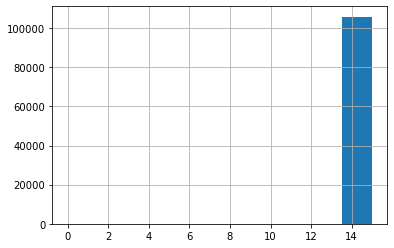

count    105816.000000
mean         14.999858
std           0.046112
min           0.000000
25%          15.000000
50%          15.000000
75%          15.000000
max          15.000000
dtype: float64

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [19]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [33]:
reviews_int=np.array(reviews_int)

In [34]:
encoded_labels=np.array(encoded_labels)

In [35]:
reviews_int

array([[ 2,  5,  2, ...,  6,  5,  2],
       [ 1,  1,  2, ...,  9,  2,  1],
       [ 7,  9,  1, ...,  3,  3,  2],
       ...,
       [13, 10, 11, ..., 15,  5,  2],
       [ 1, 12, 15, ...,  3,  7, 14],
       [ 1,  3,  3, ..., 12, 14,  1]])

In [36]:
indices

array([93314, 15098, 48936, ..., 12185, 55564, 91211])

In [37]:
# 随机打乱数据
indices=np.random.permutation(len(reviews_int))

In [38]:
X=reviews_int[indices]

In [39]:
y=encoded_labels[indices]

In [40]:
# 划分测试集和训练集
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)  

In [41]:
ytrain

array([1, 2, 2, ..., 2, 1, 2])

In [42]:
# 网络构建
model=Sequential()
model.add(Embedding(20,20,input_length=20))
model.add(LSTM(128,dropout=0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xtrain,ytrain,batch_size=1024,epochs=10,validation_data=(Xtest,ytest))


Epoch 1/10
 8/83 [=>............................] - ETA: 17s - loss: 0.6168 - accuracy: 0.5135

KeyboardInterrupt: 

In [27]:
y_pred=model.predict(Xtest)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(ytest, y_pred, labels=None, sample_weight=None)

array([[11686,     0],
       [ 9477,     0]], dtype=int64)